In [29]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
#Creating Random lats and longs and zipping them
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [31]:
# Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [32]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

38.95770129431267 -123.7123233261401
18.934142451778897 -100.34674501841987
54.9918488155694 -47.522612877374996
68.35021573254392 30.692593090273192
-80.25343049289489 179.75282012842013
-15.443795879714187 -152.99363912240725
-14.080513019673703 -107.51075408427263
-74.24255543646728 -148.1557020310446
10.348689570136656 -14.198819624546388
-37.58671526993539 -127.23730463529829
-4.289401650012934 -115.28556744795465
83.29530621765488 50.117196029763704
70.283162966095 -8.819792939692974
-58.78714371174858 115.67802578481974
-55.22255561046358 -173.82858486700863
-64.87058258725077 -114.97676969612947
-30.018923851280647 -166.61059092668387
-40.94758329387125 33.36668187098232
46.02892212962527 170.37359544920326
2.9193363311524934 112.681893840604
-44.93371288621376 7.091043169158013
-55.54279522099909 -114.81074245603963
65.03069593165546 -18.927161688724425
-57.26824137789001 -6.606817588942931
43.245546870523725 -118.77238243059176
76.01413962040567 -109.74744903605928
87.7733268

In [33]:
#Importing citipy dependency
from citipy import citipy

In [34]:
# Create a list for holding the cities.
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, we'll add it to the citie list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [35]:
#import dependencies
import requests
from config import weather_api_key
import time
from datetime import datetime

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | arlit
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | bathsheba
Processing Record 5 of Set 1 | zuwarah
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | thousand oaks
Processing Record 8 of Set 1 | yar-sale
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | luderitz
Processing Record 14 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | seoul
Processing Record 18 of Set 1 | pangnirtung
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 22 of Set 1 | otavi
P

City not found. Skipping...
Processing Record 38 of Set 4 | ternate
Processing Record 39 of Set 4 | anguillara sabazia
Processing Record 40 of Set 4 | port elizabeth
Processing Record 41 of Set 4 | barrow
Processing Record 42 of Set 4 | amahai
Processing Record 43 of Set 4 | provideniya
Processing Record 44 of Set 4 | arcos
Processing Record 45 of Set 4 | salalah
Processing Record 46 of Set 4 | alyangula
Processing Record 47 of Set 4 | naftah
City not found. Skipping...
Processing Record 48 of Set 4 | kyren
Processing Record 49 of Set 4 | dubrajpur
Processing Record 50 of Set 4 | carnarvon
Processing Record 1 of Set 5 | guarapari
Processing Record 2 of Set 5 | butaritari
Processing Record 3 of Set 5 | barranca
Processing Record 4 of Set 5 | lumphat
Processing Record 5 of Set 5 | taltal
Processing Record 6 of Set 5 | salamiyah
Processing Record 7 of Set 5 | labuhan
Processing Record 8 of Set 5 | novaya zaimka
Processing Record 9 of Set 5 | camocim
Processing Record 10 of Set 5 | saldanh

Processing Record 26 of Set 8 | pacifica
Processing Record 27 of Set 8 | mayo
Processing Record 28 of Set 8 | ahuimanu
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | rocha
Processing Record 31 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 32 of Set 8 | donghai
Processing Record 33 of Set 8 | gorno-chuyskiy
City not found. Skipping...
Processing Record 34 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 35 of Set 8 | tura
Processing Record 36 of Set 8 | masjed-e soleyman
City not found. Skipping...
Processing Record 37 of Set 8 | pasca
Processing Record 38 of Set 8 | nhulunbuy
Processing Record 39 of Set 8 | erenhot
Processing Record 40 of Set 8 | umm lajj
Processing Record 41 of Set 8 | kalmunai
Processing Record 42 of Set 8 | bontang
Processing Record 43 of Set 8 | bambanglipuro
Processing Record 44 of Set 8 | sergeyevka
Processing Record 45 of Set 8 | aflu
City not found. Skipping...
Processing Record 46 of Set 8 | 

Processing Record 11 of Set 12 | udachnyy
Processing Record 12 of Set 12 | chernyshevskiy
Processing Record 13 of Set 12 | helong
Processing Record 14 of Set 12 | tautira
Processing Record 15 of Set 12 | nouakchott
Processing Record 16 of Set 12 | prince rupert
Processing Record 17 of Set 12 | tocopilla
Processing Record 18 of Set 12 | chapais
Processing Record 19 of Set 12 | mgandu
Processing Record 20 of Set 12 | algeciras
Processing Record 21 of Set 12 | sarahan
Processing Record 22 of Set 12 | luanda
Processing Record 23 of Set 12 | ngunguru
Processing Record 24 of Set 12 | olafsvik
Processing Record 25 of Set 12 | hurricane
Processing Record 26 of Set 12 | gangotri
City not found. Skipping...
Processing Record 27 of Set 12 | ridgecrest
Processing Record 28 of Set 12 | laredo
Processing Record 29 of Set 12 | constitucion
Processing Record 30 of Set 12 | alugan
Processing Record 31 of Set 12 | kadoshkino
Processing Record 32 of Set 12 | yongan
Processing Record 33 of Set 12 | taruda

In [19]:
len(city_data)

577

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lompoc,34.6391,-120.4579,67.93,61,75,4.61,US,2022-12-22 22:09:12
1,Arlit,18.7369,7.3853,60.73,29,41,11.83,NE,2022-12-22 22:14:07
2,Vaini,-21.2000,-175.2000,86.16,74,40,9.22,TO,2022-12-22 22:14:07
3,Bathsheba,13.2167,-59.5167,79.41,69,20,17.27,BB,2022-12-22 22:14:07
4,Zuwarah,32.9312,12.0820,62.17,65,100,12.08,LY,2022-12-22 22:09:25
5,Hithadhoo,-0.6000,73.0833,81.10,71,11,15.21,MV,2022-12-22 22:14:08
6,Thousand Oaks,34.1706,-118.8376,72.12,44,100,1.99,US,2022-12-22 22:10:21
7,Yar-Sale,66.8333,70.8333,-10.86,95,21,8.52,RU,2022-12-22 22:14:09
8,Rikitea,-23.1203,-134.9692,78.06,69,14,5.12,PF,2022-12-22 22:14:09
9,Mataura,-46.1927,168.8643,62.67,81,94,3.04,NZ,2022-12-22 22:14:09


In [26]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lompoc,US,2022-12-22 22:09:12,34.6391,-120.4579,67.93,61,75,4.61
1,Arlit,NE,2022-12-22 22:14:07,18.7369,7.3853,60.73,29,41,11.83
2,Vaini,TO,2022-12-22 22:14:07,-21.2000,-175.2000,86.16,74,40,9.22
3,Bathsheba,BB,2022-12-22 22:14:07,13.2167,-59.5167,79.41,69,20,17.27
4,Zuwarah,LY,2022-12-22 22:09:25,32.9312,12.0820,62.17,65,100,12.08
5,Hithadhoo,MV,2022-12-22 22:14:08,-0.6000,73.0833,81.10,71,11,15.21
6,Thousand Oaks,US,2022-12-22 22:10:21,34.1706,-118.8376,72.12,44,100,1.99
7,Yar-Sale,RU,2022-12-22 22:14:09,66.8333,70.8333,-10.86,95,21,8.52
8,Rikitea,PF,2022-12-22 22:14:09,-23.1203,-134.9692,78.06,69,14,5.12
9,Mataura,NZ,2022-12-22 22:14:09,-46.1927,168.8643,62.67,81,94,3.04


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevan field from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

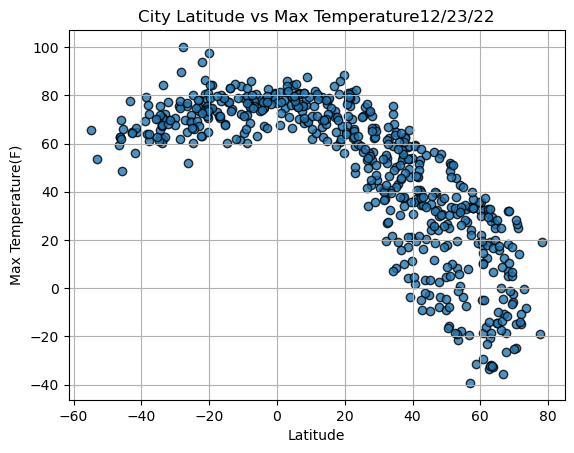

In [39]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

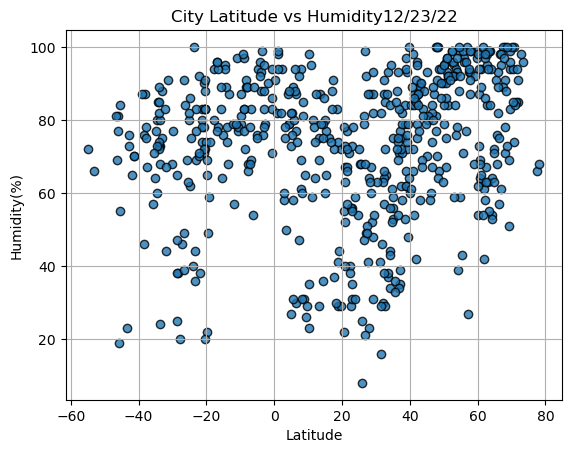

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity" + time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

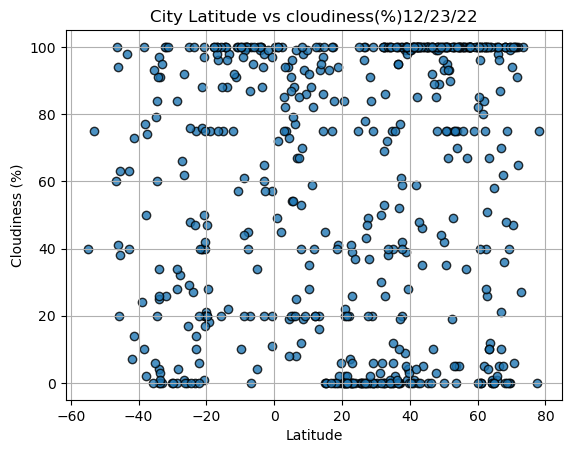

In [42]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs cloudiness(%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

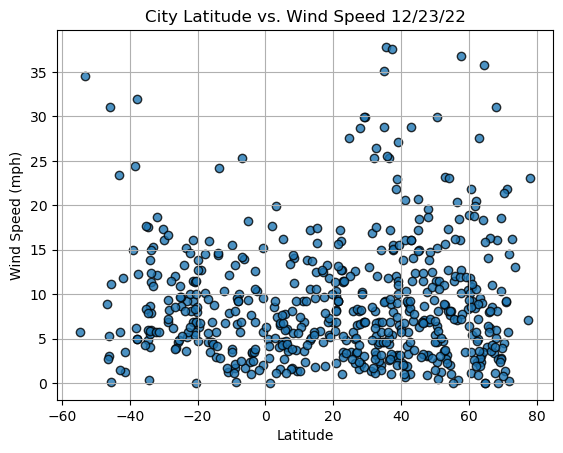

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()